In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
data=pd.read_csv(r'D:/Backup/CAX_MortgageModeling_Train.csv')


In [4]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

Number of variables,22
Number of observations,45642
Total Missing (%),0.0%
Total size in memory,7.7 MiB
Average record size in memory,176.0 B
Numeric,11
Categorical,8
Boolean,0
Date,0
Text (Unique),1
Rejected,2


In [3]:
data.columns


Index(['Unique_ID', 'MORTGAGE NUMBER', 'PROPERTY VALUE', 'MORTGAGE PAYMENT',
       'GDS', 'LTV', 'TDS', 'AMORTIZATION', 'MORTGAGE AMOUNT', 'RATE',
       'MORTGAGE PURPOSE', 'PAYMENT FREQUENCY', 'PROPERTY TYPE', 'TERM', 'FSA',
       'AGE RANGE', 'GENDER', 'INCOME', 'INCOME TYPE', 'NAICS CODE',
       'CREDIT SCORE', 'RESULT'],
      dtype='object')

In [9]:
data.head()

,Unique_ID,MORTGAGE NUMBER,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,...,PROPERTY TYPE,TERM,FSA,AGE RANGE,GENDER,INCOME,INCOME TYPE,NAICS CODE,CREDIT SCORE,RESULT
0,CAX_Train_1,1,900000,5429,61.98,65.00,71.63,360,1040000.0,4.0,...,Single Detached,12,L4C,Under 25,Male,108000,8,44-45,681,FUNDED
1,CAX_Train_2,2,386000,2179,35.22,74.29,40.65,360,390000.0,4.5,...,Single Detached,12,L9T,70 and over,Male,78000,2,56,710,FUNDED
2,CAX_Train_3,3,531000,2152,30.97,80.00,35.41,360,424800.0,3.5,...,Single Detached,6,M1N,35-39,Female,87000,2,72,709,FUNDED
3,CAX_Train_4,4,1200000,5410,19.04,75.00,34.14,360,960000.0,5.5,...,Single Detached,12,M2M,45-49,Male,300000,8,54,761,FUNDED
4,CAX_Train_5,5,350000,3342,29.59,80.00,34.85,360,592000.0,5.0,...,Single Detached,12,L7G,50-54,Male,147000,8,62,762,FUNDED


In [4]:
data.isna().any()


Unique_ID            False
MORTGAGE NUMBER      False
PROPERTY VALUE       False
MORTGAGE PAYMENT     False
GDS                  False
LTV                  False
TDS                  False
AMORTIZATION         False
MORTGAGE AMOUNT      False
RATE                 False
MORTGAGE PURPOSE     False
PAYMENT FREQUENCY    False
PROPERTY TYPE        False
TERM                 False
FSA                  False
AGE RANGE            False
GENDER               False
INCOME               False
INCOME TYPE          False
NAICS CODE           False
CREDIT SCORE         False
RESULT               False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45642 entries, 0 to 45641
Data columns (total 22 columns):
Unique_ID            45642 non-null object
MORTGAGE NUMBER      45642 non-null int64
PROPERTY VALUE       45642 non-null int64
MORTGAGE PAYMENT     45642 non-null int64
GDS                  45642 non-null float64
LTV                  45642 non-null float64
TDS                  45642 non-null float64
AMORTIZATION         45642 non-null int64
MORTGAGE AMOUNT      45642 non-null float64
RATE                 45642 non-null float64
MORTGAGE PURPOSE     45642 non-null object
PAYMENT FREQUENCY    45642 non-null object
PROPERTY TYPE        45642 non-null object
TERM                 45642 non-null int64
FSA                  45642 non-null object
AGE RANGE            45642 non-null object
GENDER               45642 non-null object
INCOME               45642 non-null int64
INCOME TYPE          45642 non-null int64
NAICS CODE           45642 non-null object
CREDIT SCORE         45642 non-nu

Train data : 45642
Test data : 15214
Variables : 21

Field Name	Description
Property Value	The appraised value of the property


Mortgage Payment
	A mortgage payment amount comprised of a principal portion, an interest portion, a property tax portion and a life insurance portion, calculated based on the interest rate, amortization period and payment frequency.

GDS	The measure of the percentage of Gross Annual Income required, including rental income if applicable, for Housing Expenses (principal & interest, property taxes, heat, 50% of condominium fees) used for qualification.

GDS % = Annualized Housing Expenses / Annual Income
LTV	Loan-to-value (LTV) is the measure of the Mortgage Amount to the Property Value.

LTV = Mortgage Amount / Appraised Property Value
TDS	The measure of the percentage of Gross Annual Income, including rental income if applicable, required for Housing Expenses (principal & interest, property taxes, heat, 50% of condominium fees) and other consumer debt obligations ("Other Expenses") used for qualification.

TDS % = (Annualized Housing Expenses + Other Expenses) / Annual Income
Amortization	The requested amortization in months.
Mortgage Amount	The requested mortgage amount in dollars.
Rate	The interest rate used to qualify the mortgage application.
Mortgage Purpose	The purpose for which the applicant(s) is/are requesting the mortgage, purchase or refinance.
Payment Frequency 	The frequency with which the applicant makes regular mortgage payments.
Property Type	The classification of the property being used to secure the mortgage.
Term	The requested mortgage term in months.
FSA	The Forward Sortation Area (FSA) is the first three characters of the postal code, designating a postal delivery area of property being mortgaged.
Age Range	The age range of the main applicant.
Gender	The gender of the main applicant.
Income	Total amount of income being used to qualify for the mortgage.
Income Type	Numericalized employment status type for the income
NAICS Code	Job Category by NAICS (North America Industry Classification System) code of the main applicant.
Credit Score	AKA Beacon Score - A number generated by the Equifax Credit Bureau for the main applicant’s credit-worthiness at the time of underwriting review and how likely it is that the applicant(s) will repay. 

Mathematical criteria involved in calculating a Beacon score can include late payments, current debts, length of time an account has been open, types of credit and new applications for credit.
Result	The result of the application, either funded or not funded


Text(0.5, 0, 'Property Value')

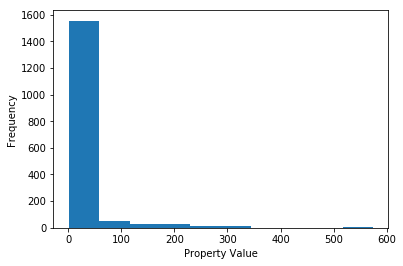

In [10]:
data['PROPERTY VALUE'].value_counts().plot.hist()
plt.xlabel('Property Value')

Text(0.5, 0, 'Gender Report')

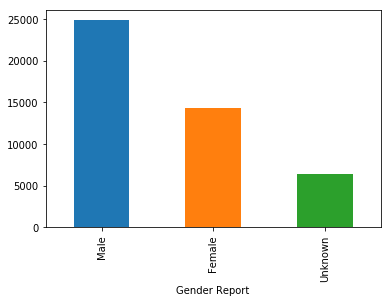

In [4]:
data.GENDER.value_counts().plot.bar()
plt.xlabel("Gender Report")

Text(0, 0.5, 'FREQUENCY')

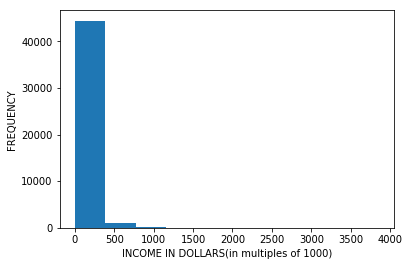

In [32]:
plt.hist(data.INCOME/1000)
plt.xlabel('INCOME IN DOLLARS(in multiples of 1000)')
plt.ylabel('FREQUENCY')

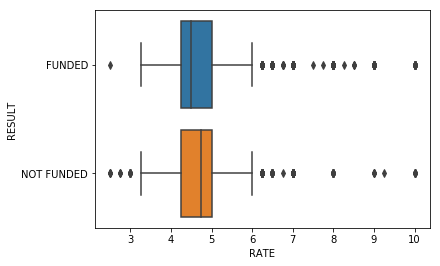

In [34]:
sns.boxplot(data['RATE'],data['RESULT'])


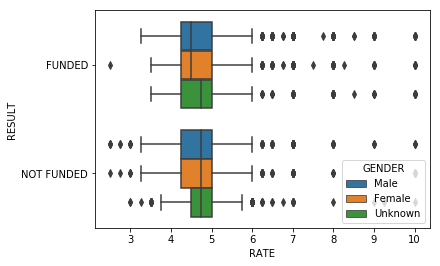

In [35]:
sns.boxplot(data['RATE'],data['RESULT'],hue=data.GENDER)


Text(0.5, 0, 'CREDIT SCORE')

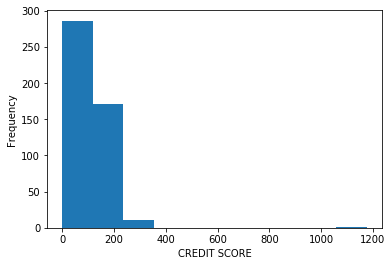

In [5]:
data['CREDIT SCORE'].value_counts().plot.hist()
plt.xlabel('CREDIT SCORE')

Text(0.5, 0, 'AMORTIZTION')

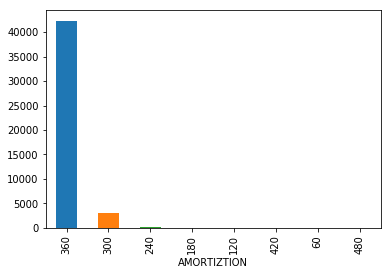

In [6]:
data.AMORTIZATION.value_counts().plot.bar()
plt.xlabel('AMORTIZTION')

Text(0.5, 0, 'PAYEMENT FREQUENCY')

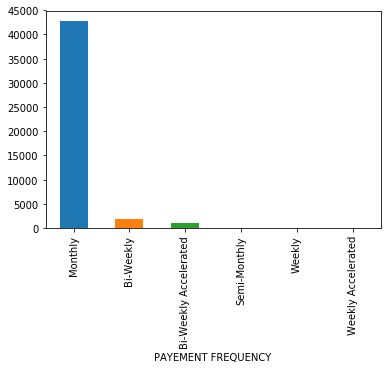

In [7]:
data['PAYMENT FREQUENCY'].value_counts().plot.bar()
plt.xlabel('PAYEMENT FREQUENCY')

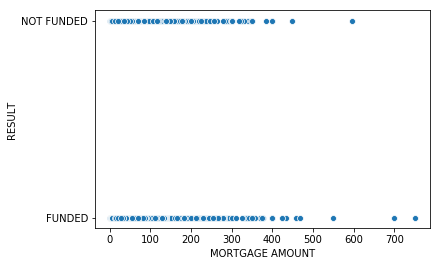

In [49]:
sns.scatterplot(data['MORTGAGE AMOUNT']/10000,data['RESULT'])

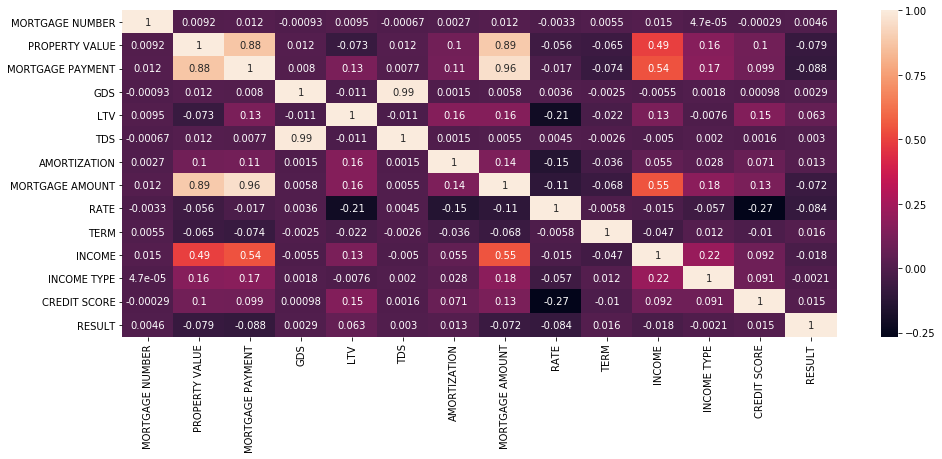

In [3]:
plt.figure(figsize=(16, 6))
data.RESULT=data.RESULT.map({"FUNDED":1,"NOT FUNDED":0})
sns.heatmap(data.corr(),annot=True)

Text(0.5, 0, 'MORTAGAGE PURPOSE')

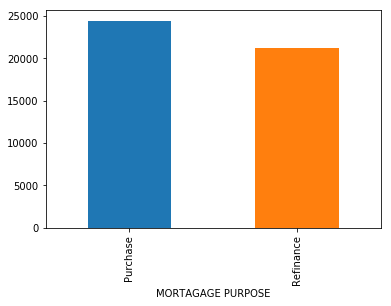

In [6]:
data['MORTGAGE PURPOSE'].value_counts().plot.bar()
plt.xlabel('MORTAGAGE PURPOSE')

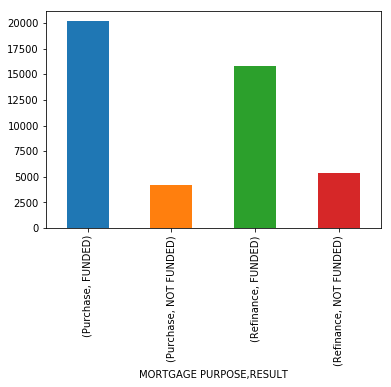

In [7]:
data.groupby('MORTGAGE PURPOSE')['RESULT'].value_counts().plot.bar()

In [8]:
data['MORTGAGE PURPOSE']=data['MORTGAGE PURPOSE'].map({'Purchase':0,'Refinance':1})

In [31]:
lr=LabelEncoder()
for i in (data.columns):
    #print(data[i].head())
    if(type(data[i])==object):
        data[i]=lr.fit_transform(data[i])

In [5]:
data.GENDER=data.GENDER.map({"Male":0,"Female":1,"Unknown":2})

In [36]:
data.GENDER.value_counts()

0    24849
1    14375
2     6418
Name: GENDER, dtype: int64

In [38]:
data['INCOME TYPE'].value_counts()

 8     21724
 2     19525
 6      1693
 3       749
 5       579
 19      410
 7       191
 1       186
-1       123
 12       95
 4        79
 9        76
 17       74
 15       47
 11       38
 10       21
 16       19
 18        7
 14        3
 20        2
 13        1
Name: INCOME TYPE, dtype: int64

In [58]:
for i in data.columns:
    if(type(data[i]==object)):
        print(i)

Unique_ID
MORTGAGE NUMBER
PROPERTY VALUE
MORTGAGE PAYMENT
GDS
LTV
TDS
AMORTIZATION
MORTGAGE AMOUNT
RATE
MORTGAGE PURPOSE
PAYMENT FREQUENCY
PROPERTY TYPE
TERM
FSA
AGE RANGE
GENDER
INCOME
INCOME TYPE
NAICS CODE
CREDIT SCORE
RESULT


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45642 entries, 0 to 45641
Data columns (total 22 columns):
Unique_ID            45642 non-null object
MORTGAGE NUMBER      45642 non-null int64
PROPERTY VALUE       45642 non-null int64
MORTGAGE PAYMENT     45642 non-null int64
GDS                  45642 non-null float64
LTV                  45642 non-null float64
TDS                  45642 non-null float64
AMORTIZATION         45642 non-null int64
MORTGAGE AMOUNT      45642 non-null float64
RATE                 45642 non-null float64
MORTGAGE PURPOSE     45642 non-null int64
PAYMENT FREQUENCY    45642 non-null object
PROPERTY TYPE        45642 non-null object
TERM                 45642 non-null int64
FSA                  45642 non-null object
AGE RANGE            45642 non-null object
GENDER               45642 non-null int64
INCOME               45642 non-null int64
INCOME TYPE          45642 non-null int64
NAICS CODE           45642 non-null object
CREDIT SCORE         45642 non-null

In [61]:
data['PAYMENT FREQUENCY'].value_counts()

Monthly                  42785
Bi-Weekly                 1803
Bi-Weekly Accelerated     1047
Semi-Monthly                 4
Weekly                       2
Weekly Accelerated           1
Name: PAYMENT FREQUENCY, dtype: int64

In [6]:
data['PAYMENT FREQUENCY']=data['PAYMENT FREQUENCY'].map({'Monthly':0,'Bi-Weekly':1,'Bi-Weekly Accelerated':2,'Semi-Monthly':3,'Weekly':4,'Weekly Accelerated':5})

In [11]:
data.drop(['NAICS CODE','AGE RANGE','FSA','Unique_ID','MORTGAGE NUMBER','PROPERTY TYPE'],inplace=True,axis=1)

In [13]:
data.to_csv('Refined_data.csv',index=False)